In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from youtube_api import api_key

url = "https://www.googleapis.com/youtube/v3/videos?id=w2Ov5jzm3j8&key=" + api_key + "&part=statistics"

In [2]:
youtube_response = requests.get(url).json()
youtube_json = json.dumps(youtube_response)
youtube_json


'{"kind": "youtube#videoListResponse", "etag": "\\"p4VTdlkQv3HQeTEaXgvLePAydmU/rdXlOVEpJx22mAE5Mhlr2VjEVgI\\"", "pageInfo": {"totalResults": 1, "resultsPerPage": 1}, "items": [{"kind": "youtube#video", "etag": "\\"p4VTdlkQv3HQeTEaXgvLePAydmU/x9Fkfetq9fSKa-RW1-uKJ-6ztv8\\"", "id": "w2Ov5jzm3j8", "statistics": {"viewCount": "346664047", "likeCount": "9286521", "dislikeCount": "258490", "favoriteCount": "0", "commentCount": "319640"}}]}'

In [3]:
view_count = youtube_response["items"][0]["statistics"]["viewCount"]
like_count = youtube_response["items"][0]["statistics"]["likeCount"]
dislike_count = youtube_response["items"][0]["statistics"]["dislikeCount"]
comment_count = youtube_response["items"][0]["statistics"]["commentCount"]

statistics_list = [{"View Count": view_count,
                   "Like Count": like_count,
                   "Dislike Count": dislike_count,
                   "Comment Count": comment_count}]

statistics_df = pd.DataFrame(statistics_list)
statistics_df

,Comment Count,Dislike Count,Like Count,View Count
0,319640,258490,9286521,346664047


In [4]:
# lets make a triple stacked comparison
statistics_list = []
video_list = []
video_name_list = ["Old Town Road (Official Movie)", "Panini (Official Video)"]
video_id_list = ["w2Ov5jzm3j8", "bXcSLI58-h8"]
for video in video_id_list:
    url =  "https://www.googleapis.com/youtube/v3/videos?id=" + video + "&key=" + api_key + "&part=statistics"
    youtube_response = requests.get(url).json()
    video_list.append(youtube_response)    

view_count_list = []
like_count_list = []  
dislike_count_list = []  
comment_count_list = []  
    
for videos in video_list:
    view_count_list.append(videos["items"][0]["statistics"]["viewCount"])
    like_count_list.append(videos["items"][0]["statistics"]["likeCount"])
    dislike_count_list.append(videos["items"][0]["statistics"]["dislikeCount"])
    comment_count_list.append(videos["items"][0]["statistics"]["commentCount"])
    
statistics_df = pd.DataFrame(view_count_list, columns=["View Count"])
statistics_df["Like Count"] = like_count_list
statistics_df["Dislike Count"] = dislike_count_list
statistics_df["Comment Count"] = comment_count_list
statistics_df["Video Name"] = video_name_list

statistics_df["Video Name"] = statistics_df["Video Name"].astype(str)
statistics_df["View Count"] = statistics_df["View Count"].astype(int)
statistics_df["Like Count"] = statistics_df["Like Count"].astype(int)
statistics_df["Dislike Count"] = statistics_df["Dislike Count"].astype(int)
statistics_df["Comment Count"] = statistics_df["Comment Count"].astype(int)

# statistics_df = statistics_df.set_index("Video Name")
statistics_df

,View Count,Like Count,Dislike Count,Comment Count,Video Name
0,346664047,9286521,258490,319640,Old Town Road (Official Movie)
1,95815789,3291206,114264,203831,Panini (Official Video)


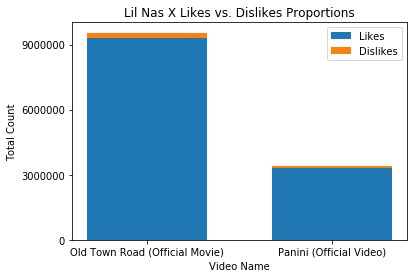

In [5]:
n = 2
ind = np.arange(n)
width = .65

p1 = plt.bar(statistics_df["Video Name"], statistics_df["Like Count"], width)
p2 = plt.bar(statistics_df["Video Name"], statistics_df["Dislike Count"], width, bottom=statistics_df["Like Count"])

plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Lil Nas X Likes vs. Dislikes Proportions')
plt.yticks(np.arange(0,12000000,3000000))
plt.legend((p1[0], p2[0]), ['Likes', 'Dislikes'], loc=1)

plt.savefig('Dislikes_vs_likes.png')
plt.show()


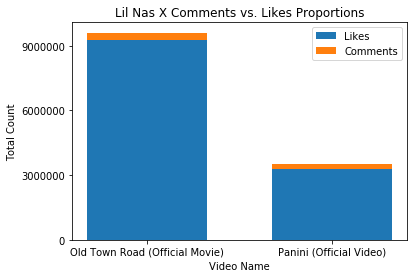

In [6]:
n = 2
ind = np.arange(n)
width = .65

p1 = plt.bar(statistics_df["Video Name"], statistics_df["Like Count"], width)
p2 = plt.bar(statistics_df["Video Name"], statistics_df["Comment Count"], width, bottom=statistics_df["Like Count"])

plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Lil Nas X Comments vs. Likes Proportions')
plt.yticks(np.arange(0,12000000,3000000))
plt.legend((p1[0], p2[0]), ['Likes', 'Comments'], loc=1)

plt.savefig('Comments_vs_likes.png')
plt.show()



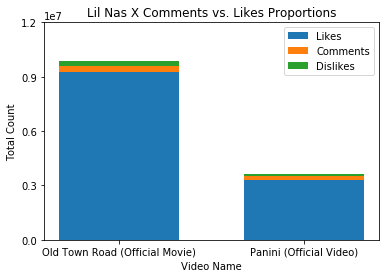

In [7]:
n = 3
ind = np.arange(n)
width = .65

p1 = plt.bar(statistics_df["Video Name"], statistics_df["Like Count"], width)
p2 = plt.bar(statistics_df["Video Name"], statistics_df["Comment Count"], width, bottom=statistics_df["Like Count"])
p3 = plt.bar(statistics_df["Video Name"], statistics_df["Dislike Count"], width, bottom=statistics_df["Like Count"]+statistics_df["Comment Count"])


plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Lil Nas X Comments vs. Likes Proportions')
plt.yticks(np.arange(0,15000000,3000000))
plt.legend((p1[0], p2[0], p3[0]), ['Likes', 'Comments', 'Dislikes'], loc=1)

plt.savefig('Comments_vs_Dislikes_vs_Likes.png')
plt.show()




In [54]:
# lets try other videos
statistics_list = []
video_list = []
video_name_list = ["Lil Nas X, Cardi B - Rodeo", "Lil Nas X - C7osure (You Like)", "Lil Nas X - Bring U Down", 
                   "Lil Nas X - Kick It", "Old Town Road (Official Movie)", "Old Town Road (Remix) [Lyric Video]",
                   "Old Town Road (Area 51 Video)", "Old Town Road (Week 17 Version)", "Old Town Road (Seoul Town Road Remix)"]

video_id_list = ["kx0Z0B8Xox0", "eLgxYjZEflI", "c_mR-dt_c3g",
                 "JTx-l_rDZP4","w2Ov5jzm3j8", "loSuMqwQA38", 
                 "aA7xDP9sQzk", "r7qovpFAGrQ", "jzlkfIWu70w"]

for video in video_id_list:
    url =  "https://www.googleapis.com/youtube/v3/videos?id=" + video + "&key=" + api_key + "&part=statistics"
    youtube_response = requests.get(url).json()
    video_list.append(youtube_response)    

view_count_list = []
like_count_list = []  
dislike_count_list = []  
comment_count_list = []  
    
for videos in video_list:
    view_count_list.append(videos["items"][0]["statistics"]["viewCount"])
    # view_count_list.append(int(videos["items"][0]["statistics"]["viewCount"]))
    like_count_list.append(videos["items"][0]["statistics"]["likeCount"])
    dislike_count_list.append(videos["items"][0]["statistics"]["dislikeCount"])
    comment_count_list.append(videos["items"][0]["statistics"]["commentCount"])
    
statistics_df = pd.DataFrame(view_count_list, columns=["View Count"])
statistics_df["Like Count"] = like_count_list
statistics_df["Dislike Count"] = dislike_count_list
statistics_df["Comment Count"] = comment_count_list
statistics_df["Video Name"] = video_name_list

statistics_df["Video Name"] = statistics_df["Video Name"].astype(str)
statistics_df["View Count"] = statistics_df["View Count"].astype(int)
# above line would be removed
statistics_df["Like Count"] = statistics_df["Like Count"].astype(int)
statistics_df["Dislike Count"] = statistics_df["Dislike Count"].astype(int)
statistics_df["Comment Count"] = statistics_df["Comment Count"].astype(int)

# lets add new statistics to the table
statistics_df["Percentage Dislikes"] = 100*(statistics_df["Dislike Count"]/(statistics_df["Like Count"] +statistics_df["Dislike Count"]))
statistics_df["Percentage Likes"] = 100*(statistics_df["Like Count"]/(statistics_df["Like Count"] +statistics_df["Dislike Count"]))


# statistics_df = statistics_df.set_index("Video Name")
statistics_df

,View Count,Like Count,Dislike Count,Comment Count,Video Name,Percentage Dislikes,Percentage Likes
0,60611407,1397658,48896,85910,"Lil Nas X, Cardi B - Rodeo",3.380171,96.619829
1,7272809,205851,6213,21730,Lil Nas X - C7osure (You Like),2.929776,97.070224
2,2996568,106602,2749,6651,Lil Nas X - Bring U Down,2.513923,97.486077
3,6257774,173480,6131,11612,Lil Nas X - Kick It,3.413488,96.586512
4,346833284,9288308,258548,319714,Old Town Road (Official Movie),2.708200,97.291800
5,29354596,551783,61259,54707,Old Town Road (Remix) [Lyric Video],9.992627,90.007373
6,10757611,485411,26971,43951,Old Town Road (Area 51 Video),5.263846,94.736154
7,68834831,940995,35654,27218,Old Town Road (Week 17 Version),3.650646,96.349354
8,13752395,738214,40766,62094,Old Town Road (Seoul Town Road Remix),5.233254,94.766746


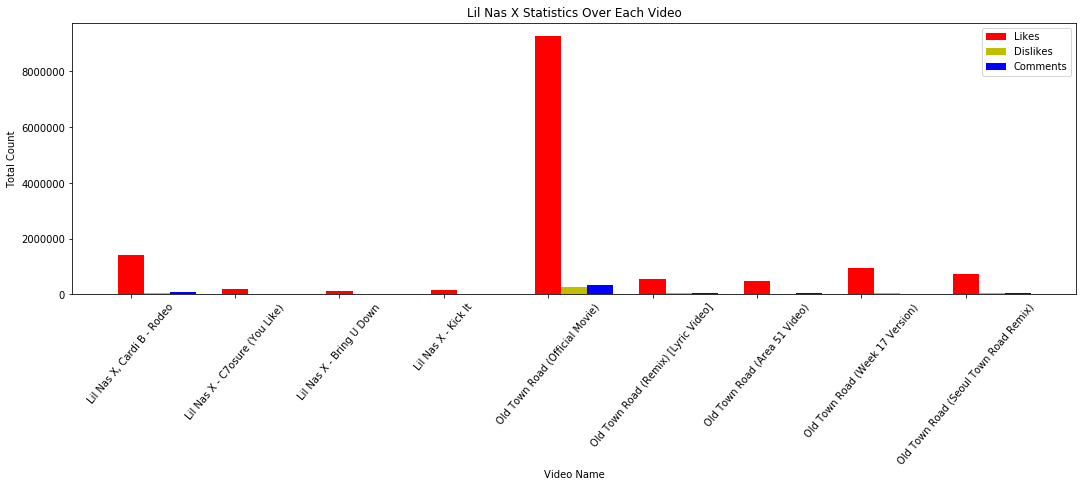

In [55]:
n = 9
ind = np.arange(n)
width = 0.25

fig, ax = plt.subplots(figsize=(18,5))
pbar1 = plt.bar(ind, statistics_df["Like Count"], width, color='r')
pbar2 = plt.bar(ind+width, statistics_df["Dislike Count"], width, color='y')
pbar3 = plt.bar(ind+width+width, statistics_df["Comment Count"], width, color='b')
plt.xticks(rotation = 50)

plt.xticks(ind, statistics_df["Video Name"])
plt.ylabel('Total Count')
plt.xlabel('Video Name')
plt.title('Lil Nas X Statistics Over Each Video')

plt.legend((pbar1[0], pbar2[0], pbar3[0]), ['Likes', 'Dislikes', 'Comments'], loc=1)

plt.savefig('Statistics_Over_Each_Videos.png')
plt.show()